## Fairness Evaluation

Using a confusion matrix to test fairness in a dataset with a categorical variable involves examining the performance of a machine learning model on different subgroups defined by that variable. Fairness assessment aims to identify any potential disparities in the model's predictions across different groups. The following steps were followed for fairness testing:

Step 1: Define the Protected Attribute

Identify the categorical variable that represents the protected attribute, such as gender, race, or age. This attribute should be protected to ensure fairness in the model's predictions.

Step 2: Split the Data

Divide your dataset into subgroups based on the protected attribute, in this case, 'EJ'.

Step 3: Train the Model

Train your machine learning model on the training dataset. Use the Random Forest model as it was the most accurate model in our previous trainings.

Step 4: Make Predictions

Use the trained model to make predictions on the test dataset for each subgroup separately. Compute the confusion matrix for each subgroup's predictions.

Step 5: Analyze the Confusion Matrix

For each confusion matrix, analyze the performance metrics to assess fairness. Key metrics to consider include:

- True Positive (TP): The number of instances correctly predicted as positive.
- False Positive (FP): The number of instances incorrectly predicted as positive.
- True Negative (TN): The number of instances correctly predicted as negative.
- False Negative (FN): The number of instances incorrectly predicted as negative.

Step 6: Assess Fairness

To assess fairness, compare the performance metrics (TP, FP, TN, FN) across different subgroups defined by the protected attribute. Look for significant disparities in these metrics, indicating potential bias in the model's predictions.

Common fairness measures include:

- False Positive Rate (FPR): FP / (FP + TN)
- False Negative Rate (FNR): FN / (TP + FN)
- False Discovery Rate (FDR): FP / (FP + TP)
- False Omission Rate (FOR): FN / (FN + TN)
- Accuracy: (TP + TN) / (TP + TN + FP + FN)

### Import Packages

In [1]:
# !pip install mlxtend
# standard 
import numpy as np
import pandas as pd
import random
import os

# data preprocessing
from sklearn import preprocessing

# exploratory analysis
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import seaborn as sns #sb
from IPython.display import Image

# model fit
import statsmodels.api as sm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers

# prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from mlxtend.plotting import heatmap
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.manifold import TSNE
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

# This tells matplolib not to try opening a new window for each plot
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# For producing decision tree diagrams.
from IPython.core.display import Image, display
import pydot
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris



2023-08-08 02:58:31.919064: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-08 02:58:31.979530: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-08 02:58:31.981378: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-08 02:58:32.958072: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Read csvs

In [2]:
EJ_A_X_Test_std = pd.read_csv(
    '../Final Files/data/EJ_A_X_Test_std.csv',
    delimiter='\,'
)
EJ_A_Y_Test = pd.read_csv(
    '../Final Files/data/EJ_A_Y_Test.csv',
    delimiter='\,'
)
EJ_B_X_Test_std = pd.read_csv(
    '../Final Files/data/EJ_B_X_Test_std.csv',
    delimiter='\,'
)
EJ_B_Y_Test = pd.read_csv(
    '../Final Files/data/EJ_B_Y_Test.csv',
    delimiter='\,'
)
X_train_std = pd.read_csv(
    '../Final Files/data/X_train_std.csv',
    delimiter='\,'
)
X_test_std = pd.read_csv(
    '../Final Files/data/X_test_std.csv',
    delimiter='\,'
)
Y_train = pd.read_csv(
    '../Final Files/data/Y_train.csv',
    delimiter='\,'
)
Y_test = pd.read_csv(
    '../Final Files/data/Y_test.csv',
    delimiter='\,'
)

In [3]:
print("shape: ", EJ_A_X_Test_std.shape)
print("shape: ", EJ_A_Y_Test.shape)
print("shape: ", EJ_B_X_Test_std.shape)
print("shape: ", EJ_B_Y_Test.shape)

print("shape: ", X_train_std.shape)
print("shape: ", X_test_std.shape)
print("shape: ", Y_train.shape)
print("shape: ", Y_test.shape)

shape:  (50, 58)
shape:  (50, 2)
shape:  (74, 58)
shape:  (74, 2)
shape:  (493, 58)
shape:  (124, 58)
shape:  (493, 2)
shape:  (124, 2)


### Population

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

Y_train_single = Y_train.iloc[:, 1]
Y_test_single = Y_test.iloc[:, 1]

# Step 1: Create Random Forest Model for Population
model_rf = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10, max_features='sqrt')

# Step 2: Fit the Random Forest Model for Population
model_rf.fit(X_train_std, Y_train_single)

# Step 3: Make Predictions for Population using the Test Set
predictions_pop = model_rf.predict(X_test_std)

# Calculate Accuracy using accuracy_score
accuracy = model_rf.score(X_test_std, Y_test_single)
print('Accuracy:', accuracy)

Accuracy: 0.9274193548387096


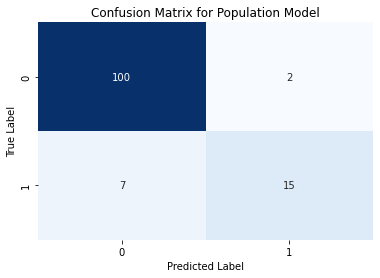

In [5]:
# Step 4: Analyze Confusion Matrix for Subgroup B
confusion_matrix = tf.math.confusion_matrix(Y_test_single, predictions_pop)  

label_names = np.unique(Y_test_single)
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',  
                 xticklabels = label_names, yticklabels = label_names, cbar=False)

ax.set(xlabel='Predicted Label', ylabel='True Label')
ax.set_title('Confusion Matrix for Population Model')

plt.show()


In [6]:
#precision_score/recall_score/f1_score 

print("tf.keras.metrics")  
p = tf.keras.metrics.Precision(thresholds=None, top_k=None, class_id=None, name=None, dtype=None)
p.update_state(Y_test_single, predictions_pop)  #update_state to update metric scores
print("Precision score: %.3f" %p.result().numpy())

r = tf.keras.metrics.Recall(thresholds=None, top_k=None, class_id=None, name=None, dtype=None)
r.update_state(Y_test_single, predictions_pop)
print("Recall score: %.3f" %r.result().numpy())

print(f"F1 score: {2*((p.result().numpy()*r.result().numpy())/(p.result().numpy()+r.result().numpy())):.3f}")

tf.keras.metrics
Precision score: 0.882
Recall score: 0.682
F1 score: 0.769


### Subgroup A

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Select a single target feature for subgroup A 
EJ_A_Y_Test_single = EJ_A_Y_Test.iloc[:, 1]
Y_train_single = Y_train.iloc[:, 1]

# Step 1: Create Random Forest Model for Subgroup A
model_subgroup_A = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10, max_features='sqrt')

# Step 2: Fit the Random Forest Model for Subgroup A
model_subgroup_A.fit(X_train_std, Y_train_single)

# Step 3: Make Predictions for Subgroup A using the Test Set
predictions_subgroup_A = model_subgroup_A.predict(EJ_A_X_Test_std)

print ('Accuracy:', model_subgroup_A.score(EJ_A_X_Test_std, EJ_A_Y_Test_single))

Accuracy: 0.98


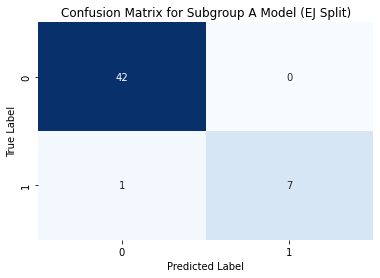

In [8]:
# Step 4: Analyze Confusion Matrix for Subgroup A
confusion_matrix = tf.math.confusion_matrix(EJ_A_Y_Test_single, predictions_subgroup_A)  

label_names = np.unique(EJ_A_Y_Test_single)
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',  
                 xticklabels = label_names, yticklabels = label_names, cbar=False)

ax.set(xlabel='Predicted Label', ylabel='True Label')
ax.set_title('Confusion Matrix for Subgroup A Model (EJ Split)')

plt.show()


In [9]:
#precision_score/recall_score/f1_score 

print("tf.keras.metrics")  
p = tf.keras.metrics.Precision(thresholds=None, top_k=None, class_id=None, name=None, dtype=None)
p.update_state(EJ_A_Y_Test_single, predictions_subgroup_A)  #update_state to update metric scores
print("Precision score: %.3f" %p.result().numpy())

r = tf.keras.metrics.Recall(thresholds=None, top_k=None, class_id=None, name=None, dtype=None)
r.update_state(EJ_A_Y_Test_single, predictions_subgroup_A)
print("Recall score: %.3f" %r.result().numpy())

print(f"F1 score: {2*((p.result().numpy()*r.result().numpy())/(p.result().numpy()+r.result().numpy())):.3f}")

tf.keras.metrics
Precision score: 1.000
Recall score: 0.875
F1 score: 0.933


### Subgroup B

In [10]:
# Select a single target feature for subgroup B 
EJ_B_Y_Test_single = EJ_B_Y_Test.iloc[:, 1]
Y_train_single = Y_train.iloc[:, 1]

# Step 1: Create Random Forest Model for Subgroup B
model_subgroup_B = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10, max_features='sqrt')

# Step 2: Fit the Random Forest Model for Subgroup B
model_subgroup_B.fit(X_train_std, Y_train_single)

# Step 3: Make Predictions for Subgroup B using the Test Set
predictions_subgroup_B = model_subgroup_B.predict(EJ_B_X_Test_std)

print ('Accuracy:', model_subgroup_B.score(EJ_B_X_Test_std, EJ_B_Y_Test_single))

Accuracy: 0.8918918918918919


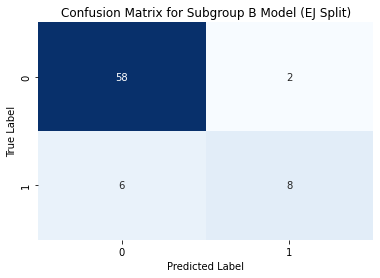

In [11]:
# Step 4: Analyze Confusion Matrix for Subgroup B
confusion_matrix = tf.math.confusion_matrix(EJ_B_Y_Test_single, predictions_subgroup_B)  

label_names = np.unique(EJ_B_Y_Test_single)
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',  
                 xticklabels = label_names, yticklabels = label_names, cbar=False)

ax.set(xlabel='Predicted Label', ylabel='True Label')
ax.set_title('Confusion Matrix for Subgroup B Model (EJ Split)')
plt.show()


In [12]:
#precision_score/recall_score/f1_score 

print("tf.keras.metrics")  
p = tf.keras.metrics.Precision(thresholds=None, top_k=None, class_id=None, name=None, dtype=None)
p.update_state(EJ_B_Y_Test_single, predictions_subgroup_B)  #update_state to update metric scores
print("Precision score: %.3f" %p.result().numpy())

r = tf.keras.metrics.Recall(thresholds=None, top_k=None, class_id=None, name=None, dtype=None)
r.update_state(EJ_B_Y_Test_single, predictions_subgroup_B)
print("Recall score: %.3f" %r.result().numpy())

print(f"F1 score: {2*((p.result().numpy()*r.result().numpy())/(p.result().numpy()+r.result().numpy())):.3f}")

tf.keras.metrics
Precision score: 0.800
Recall score: 0.571
F1 score: 0.667
